In [1]:
import base64

import matplotlib.pyplot as plt
import numpy as np
import requests

from aaron_rw_tfrecord import read_tfrecord
from aaron_simple_example import *

plt.show()

tf.enable_eager_execution()


In [2]:
infile = '/tmp/data/mnist/tmp0dGBYT/train_shuffled-00000-of-00001.gz'
img = read_tfrecord(infile)
img.shape

Instructions for updating:
Colocations handled automatically by placer.


(28, 28, 1)

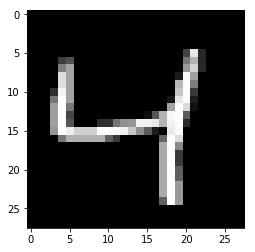

In [3]:
def display_image(img):
    """
    Coverts a 1-channel np.ndarray to 3-channel and displays it
    using matplotlib
    """
    assert isinstance(img, np.ndarray), type(img)

    stacked_img = np.stack((np.squeeze(img), ) * 3, axis=-1)
    assert stacked_img.shape == (28, 28, 3), stacked_img.shape

    plt.imshow(stacked_img, cmap=plt.get_cmap('gray'))

display_image(img)

In [4]:
# Open and read image as bitstring
image_infile = '/Users/aaron/Desktop/mnist-test-4.png'
with open(image_infile, 'rb') as f:
    input_image = f.read()

print("Raw bitstring: " + str(input_image[:10]) + " ... " + str(input_image[-10:]))

Raw bitstring: �PNG

   ...   IEND�B`�


In [5]:
# Encode image in b64
encoded_input_string = base64.b64encode(input_image)
input_string = encoded_input_string.decode("utf-8")
print("Base64 encoded string: " + input_string[:10] + " ... " + input_string[-10:])

Base64 encoded string: iVBORw0KGg ... lFTkSuQmCC


In [6]:
url = 'http://localhost:8501/v1/models/mnist:predict'
data ={
      "inputs": input_string
    }
r = requests.post(url, json=data)
r, r.content

(<Response [501]>,
 '{ "error": "Cast string to float is not supported\\n\\t [[{{node dnn/input_from_feature_columns/input_layer/image/ToFloat}}]]" }')